# 2. Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "C:\DL\FastCampus\DataAnalysis\CSV\data_2021.csv"
data = pd.read_csv(file)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154110 entries, 0 to 154109
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     154110 non-null  int64
 1   집계시      154110 non-null  int64
 2   출발영업소코드  154110 non-null  int64
 3   도착영업소코드  154110 non-null  int64
 4   통행시간     154110 non-null  int64
 5   요일       154110 non-null  int64
dtypes: int64(6)
memory usage: 7.1 MB


# 3. 집계시

In [5]:
data_06_22 = data[data.집계시.isin(range(6,23))]
data_06_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115832 entries, 0 to 154109
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     115832 non-null  int64
 1   집계시      115832 non-null  int64
 2   출발영업소코드  115832 non-null  int64
 3   도착영업소코드  115832 non-null  int64
 4   통행시간     115832 non-null  int64
 5   요일       115832 non-null  int64
dtypes: int64(6)
memory usage: 6.2 MB


In [6]:
data_06_22.sort_values(by="집계시")

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
84170,20210721,6,101,140,15381,2
38628,20210406,6,101,105,720,1
56035,20210512,6,101,105,804,2
56036,20210512,6,101,105,688,2
38627,20210406,6,101,105,892,1
...,...,...,...,...,...,...
96627,20210819,22,101,120,8836,3
148322,20211218,22,101,115,5955,5
148321,20211218,22,101,115,4662,5
11015,20210128,22,101,115,5424,3


In [8]:
data_06_22_count = data_06_22["집계시"].value_counts()

In [9]:
data_06_22_count

9     7116
10    7113
11    7101
12    7098
13    7089
14    7087
15    7012
16    6987
8     6978
17    6903
18    6776
7     6763
19    6659
20    6509
6     6392
21    6255
22    5994
Name: 집계시, dtype: int64

In [12]:
# Store index of data_06_22_count into x
x = data_06_22_count.index
print(x)
# Conver x value to string in order to avoid int sorting
x = [str(i) for i in x]
print(x)

Int64Index([9, 10, 11, 12, 13, 14, 15, 16, 8, 17, 18, 7, 19, 20, 6, 21, 22], dtype='int64')
['9', '10', '11', '12', '13', '14', '15', '16', '8', '17', '18', '7', '19', '20', '6', '21', '22']


In [13]:
# Store value of data_06_22_count into y
y = data_06_22_count.values
print(y)

[7116 7113 7101 7098 7089 7087 7012 6987 6978 6903 6776 6763 6659 6509
 6392 6255 5994]


In [37]:
# Calculate ratio and accumulated ratio
ratio = y / y.sum()
ratio_sum = ratio.cumsum()
print(ratio)
print(ratio_sum)

[0.32219194 0.24542859 0.17892415 0.05622607 0.05104795 0.05011356
 0.04939329 0.04667445]
[0.32219194 0.56762053 0.74654468 0.80277075 0.8538187  0.90393226
 0.95332555 1.        ]


[0.  0.2 0.4 0.6 0.8 1.  1.2]
['6%', '12%', '18%', '25%', '31%', '37%', '43%', '49%', '55%', '61%', '67%', '73%', '78%', '84%', '89%', '95%', '100%']


C:\Users\Jin\AppData\Local\Temp/ipykernel_15160/3149095704.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  lineChart.set_yticklabels(['{:,.1%}'.format(x) for x in ranges])


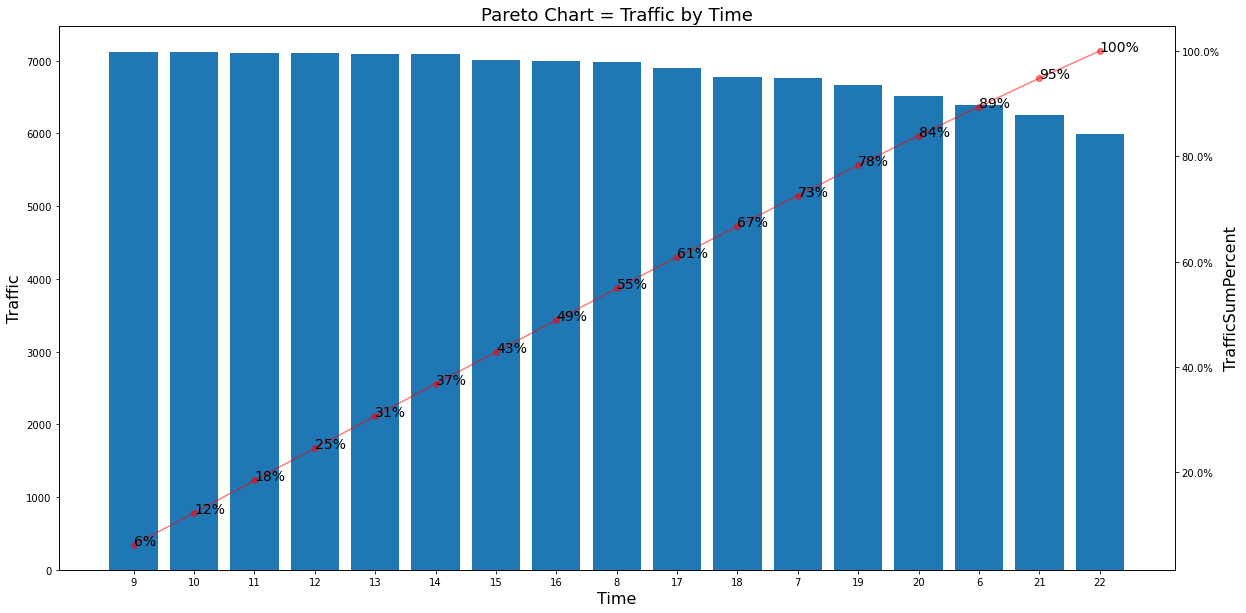

In [30]:
# Config figure size
fig, barChart = plt.subplots(figsize=(20,10))
# Create Bar Chart
barChart.bar(x, y)
# Create Line Chart
lineChart = barChart.twinx()
lineChart.plot(x, ratio_sum, "-ro", alpha=0.5)
# Create right Site label
ranges = lineChart.get_yticks()
print(ranges)
lineChart.set_yticklabels(['{:,.1%}'.format(x) for x in ranges])
# Create Annotation on line Chart
ratio_sum_percentage = ["{0:,.0%}".format(x) for x in ratio_sum]
print(ratio_sum_percentage)
for i, txt in enumerate(ratio_sum_percentage):
    lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=14)
# Generate label and title
barChart.set_xlabel("Time", fontdict={"size":16})
barChart.set_ylabel("Traffic", fontdict={"size":16})
lineChart.set_ylabel("TrafficSumPercent", fontdict={"size":16})
plt.title("Pareto Chart = Traffic by Time", fontsize=18)
# Show Plot 
plt.show()


In [19]:
print(ranges)

[0.  0.2 0.4 0.6 0.8 1.  1.2]


# 4. 도착영업소코드

In [32]:
data_destination_count = data['도착영업소코드'].value_counts()

In [33]:
data_destination_count

105    49653
110    37823
115    27574
140     8665
130     7867
125     7723
135     7612
120     7193
Name: 도착영업소코드, dtype: int64

In [34]:
# Store index of data_06_22_count into x
x = data_destination_count.index
print(x)
# Conver x value to string in order to avoid int sorting
x = [str(i) for i in x]
print(x)

Int64Index([105, 110, 115, 140, 130, 125, 135, 120], dtype='int64')
['105', '110', '115', '140', '130', '125', '135', '120']


In [35]:
# Store value of data_06_22_count into y
y = data_destination_count.values
print(y)

[49653 37823 27574  8665  7867  7723  7612  7193]


In [38]:
# Calculate ratio and accumulated ratio
ratio = y / y.sum()
ratio_sum = ratio.cumsum()
print(ratio)
print(ratio_sum)

[0.32219194 0.24542859 0.17892415 0.05622607 0.05104795 0.05011356
 0.04939329 0.04667445]
[0.32219194 0.56762053 0.74654468 0.80277075 0.8538187  0.90393226
 0.95332555 1.        ]


[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]
['32%', '57%', '75%', '80%', '85%', '90%', '95%', '100%']


C:\Users\Jin\AppData\Local\Temp/ipykernel_15160/2319066541.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  lineChart.set_yticklabels(['{:,.1%}'.format(x) for x in ranges])


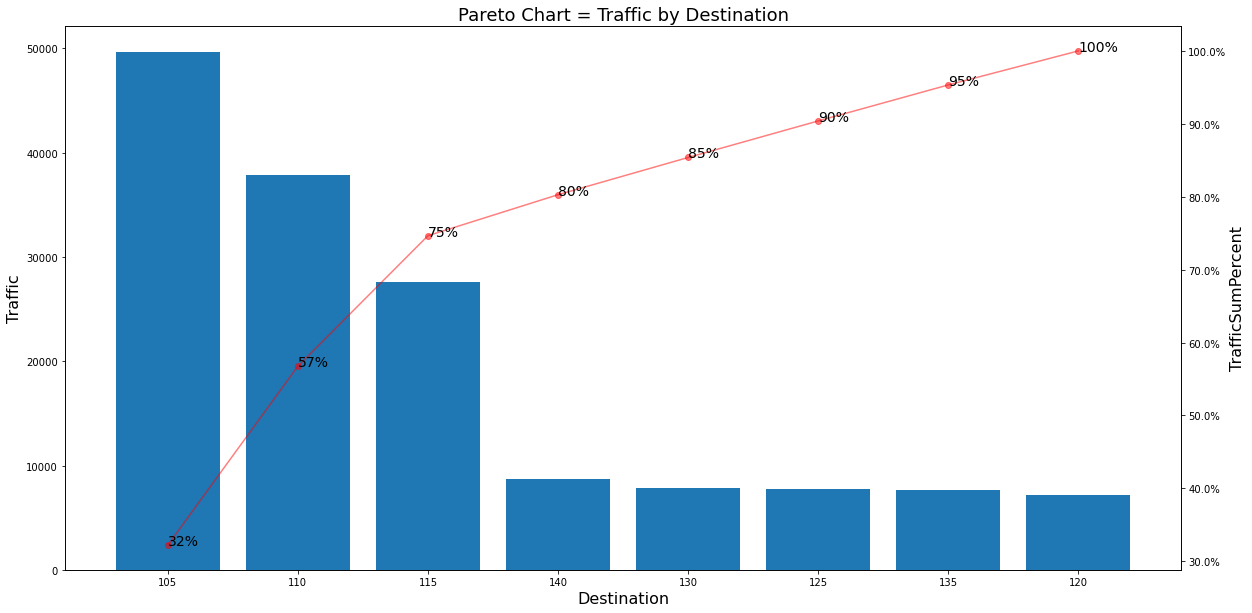

In [40]:
# Config figure size
fig, barChart = plt.subplots(figsize=(20,10))
# Create Bar Chart
barChart.bar(x, y)
# Create Line Chart
lineChart = barChart.twinx()
lineChart.plot(x, ratio_sum, "-ro", alpha=0.5)
# Create right Site label
ranges = lineChart.get_yticks()
print(ranges)
lineChart.set_yticklabels(['{:,.1%}'.format(x) for x in ranges])
# Create Annotation on line Chart
ratio_sum_percentage = ["{0:,.0%}".format(x) for x in ratio_sum]
print(ratio_sum_percentage)
for i, txt in enumerate(ratio_sum_percentage):
    lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=14)
# Generate label and title
barChart.set_xlabel("Destination", fontdict={"size":16})
barChart.set_ylabel("Traffic", fontdict={"size":16})
lineChart.set_ylabel("TrafficSumPercent", fontdict={"size":16})
plt.title("Pareto Chart = Traffic by Destination", fontsize=18)
# Show Plot 
plt.show()